In [62]:
import random
import math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple, deque

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

device = torch.device("cpu")

We need to build the shapes for the game 1010!
There are 19 different types of shapes, and we also inlude a generator for picking the three shapes in the next step.

In [63]:
class shapes:
  def __init__(self, shapes_cnt = 19):
    self.shapes = np.zeros((shapes_cnt, 5, 5), dtype = bool)
    self.shapes_cnt = shapes_cnt
    self.shapes[0] = [[1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[1] = [[1, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[2] = [[1, 1, 1, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[3] = [[1, 1, 1, 1, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[4] = [[1, 1, 1, 1, 1],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[5] = [[1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[6] = [[1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[7] = [[1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[8] = [[1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0]]
    self.shapes[9] = [[1, 1, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[10] =[[1, 0, 0, 0, 0],
                      [1, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[11] =[[1, 1, 0, 0, 0],
                      [0, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[12] =[[0, 1, 0, 0, 0],
                      [1, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[13] =[[1, 1, 0, 0, 0],
                      [1, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[14] =[[1, 1, 1, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[15] =[[1, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [1, 1, 1, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[16] =[[1, 1, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[17] =[[0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [1, 1, 1, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
    self.shapes[18] =[[1, 1, 1, 0, 0],
                      [1, 1, 1, 0, 0],
                      [1, 1, 1, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]]
                      
  def generate(self, num = 3):
    next_shapes = torch.zeros((self.shapes_cnt), dtype = float)
    for i in range(num):
      next_shapes[random.randrange(self.shapes_cnt)] += 1
    return next_shapes
shape_bank = shapes()

This is where most of our game is played, we maintain the grid and simulate all the actions within this class.

In [64]:
class Enviro:
  def __init__(self, grid_sz = 10):
    self.grid = torch.zeros((grid_sz, grid_sz), device=device, dtype = torch.float32)
    self.grid_sz = grid_sz
    self.piece_bag = torch.zeros((19), device=device, dtype = torch.float32)

  def reset(self):
    self.grid = torch.zeros((self.grid_sz, self.grid_sz), device=device, dtype = torch.float32)
    self.piece_bag = shape_bank.generate()
    return torch.cat((self.grid.view((self.grid_sz * self.grid_sz)), self.piece_bag)).unsqueeze(0)

  def invalid_move(self):
    #print("YEP")
    return torch.cat((self.grid.view((self.grid_sz * self.grid_sz)), self.piece_bag)).unsqueeze(0), 0, True

  def do_step(self, piece, xpos, ypos):
    if piece == -1:
      return self.invalid_move()

    new_grid = self.grid
    
    #Checking if the move is valid or not
    for i in range(5):
      for j in range(5):
        if i + xpos >= 10 or j + ypos >= 10:
          if shape_bank.shapes[piece][i][j] == True:
            return self.invalid_move()
        else:
          if shape_bank.shapes[piece][i][j] == True:
            if self.grid[i + xpos][j + ypos] > 0.0:
              return self.invalid_move()
            else:
              new_grid[i + xpos][j + ypos] = 1.0

    #After the placement of the piece, we might clear some columns/rows
    row_clear = torch.zeros(self.grid_sz, dtype=torch.bool)
    col_clear = torch.zeros(self.grid_sz, dtype=torch.bool)

    for i in range(self.grid_sz):
      counter = 0
      for j in range(self.grid_sz):
        if new_grid[i][j] > 0:
          counter += 1
      if counter == self.grid_sz:
        row_clear[i] = True

    for j in range(self.grid_sz):
      counter = 0
      for i in range(self.grid_sz):
        if new_grid[i][j] > 0:
          if row_clear[i] == True:
            new_grid[i][j] = 0
          counter += 1
      if counter == self.grid_sz:
        col_clear[j] = True

    for j in range(self.grid_sz):
      if col_clear[j] == True:
        for i in range(self.grid_sz):
          new_grid[i][j] = 0
    self.grid = new_grid
    for i in range(19):
      if int(self.piece_bag[i] > 0):
        return torch.cat((self.grid.view((self.grid_sz * self.grid_sz)), self.piece_bag)).unsqueeze(0), 1, False
    self.piece_bag = shape_bank.generate()
    return torch.cat((self.grid.view((self.grid_sz * self.grid_sz)), self.piece_bag)).unsqueeze(0), 1, False

  def step(self, action):
    xpos = int((action % 100) / 10)
    ypos = int((action % 100) % 10)
    placeholder = int(self.piece_bag[int(action / 100)])
    piece = -1
    for i in range(19):
      if int(self.piece_bag[i]) > placeholder:
        self.piece_bag[i] -= 1
        piece = i
        break
      placeholder -= int(self.piece_bag[i])

    return self.do_step(piece = piece, xpos = xpos, ypos = ypos)

Choice of important hyperparameters:

*    gamma - A high gamma is important to make sure the network somewhat values later states, but low enough as the AI often struggled in the near term
*    T - A high t-value was chosen to prevent instability in the training
*    hidden_layer_size - chosen fairly high as more abstraction was necessary for he limited possibilities in input/output layers



In [65]:
#Hyper Parameters

EPISODES = 5000 # number of episodes
EPS_START = 0.99 # epsilon-greedy start
EPS_END = 0.01 # epsilon-greedy end
EPS_DECAY = 200 # decay rate of epsilon
GAMMA = 0.95 # Q-learning discount factor
T = 150 # target net update rate
HIDDEN_SIZE = 512 # neural net hidden layer size
BATCH_SIZE = 64 # Q-learning batch size

Our replay memory for the Q-learning was implemented as a deque

In [66]:
Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'terminal'))

class ReplayMemory:
  def __init__(self, capacity):
    self.memory = deque([],maxlen=capacity)

  def push(self, *x):
    self.memory.append(Transition(*x))
  
  def sample(self, BATCH_SIZE):
    return random.sample(self.memory, BATCH_SIZE)
  
  def __len__(self):
    return len(self.memory)

The neural network has 119 input nodes, two hidden layers of size 512, and an output layer of size 300. Generally, two hidden layers can approximate any function, and it gave many performance improvements compared to only using one hidden layer, likely caused by more abstraction in the decision-making process

The activation function was chosen to be leaky_ReLU as it gave more stability and improved performance when compared to standard ReLU.

In [67]:
# Neutral Network with 2 hidden layers

class NeuralNet(nn.Module):
    def __init__(self):
      nn.Module.__init__(self)
      self.l1 = nn.Linear(119, HIDDEN_SIZE)
      self.l2 = nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE)
      self.l3 = nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE)
      self.l4 = nn.Linear(HIDDEN_SIZE, 300)

    def forward(self, var):
      var = var.to(device)
      var = nn.functional.leaky_relu(self.l1(var))
      var = nn.functional.leaky_relu(self.l2(var))
      var = nn.functional.leaky_relu(self.l3(var))
      var = self.l4(var)
      return var

Here I create a policy network and a target network. The target network maintains old policy networks and is always kept in evaluation mode as it never gets trained. It helps to prevent catastrophic forgetting and adds stability.

I use Adam as a generic optimizer function.

The epsilon decay is done exponentially.

In [68]:
policy_net = NeuralNet().to(device)
target_net = NeuralNet().to(device)
policy_net = policy_net.double()
target_net = target_net.double()
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(), lr = 3e-4)
memory = ReplayMemory(10000)
steps = 0

def find_action(state):
  global steps
  sample = random.random()

  threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1.0 * steps / EPS_DECAY)

  steps += 1

  #Return value is a tensor of size (1, 1) in order to more easily access the information in later steps
  if sample > threshold:
    with torch.no_grad():
      actions = policy_net(state)
      action = torch.argmax(actions).item()
      return torch.tensor([[action]])
  else:
    return torch.tensor([[random.randrange(300)]], device=device, dtype=torch.long)

I take the previous values from our replay memory randomly and use them here to train the model. It works by taking the sum of the reward and the simulated steps from the target network to find our expected value. Any step that results in a completed game is given an expected value of -1. 

The current policy network is then trained against this expected value with SmoothL1Loss

I also use gradient clipping to remove more instability.

In [69]:
def learn():
  if len(memory) < BATCH_SIZE:
    return

  transitions = memory.sample(BATCH_SIZE)
  batch = Transition(*zip(*transitions))

  batch_action = torch.cat(batch.action)
  batch_state = torch.cat(batch.state)
  batch_reward = torch.cat(batch.reward)
  batch_terminal = torch.cat(batch.terminal)
  batch_next_state = torch.cat(batch.next_state)
  
  Q_value = policy_net(batch_state).gather(1, batch_action)
  Q_next = target_net(batch_next_state).max(dim=1)[0].unsqueeze(1)
  Q_next[batch_terminal] = 0.0
  Q_expected = batch_reward.unsqueeze(1) + GAMMA * Q_next

  criterion = nn.SmoothL1Loss()
  loss = criterion(Q_value, Q_expected)

  optimizer.zero_grad()
  loss.backward()

  for parameters in policy_net.parameters():
        parameters.grad.data.clamp_(-1, 1)

  optimizer.step()


This is copied code to help plot the training data.

In [70]:
episode_durations = []

def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)

This is where everything is actually simulated, we find the action based on our state and the current policy network, then push it to our memory and attempt to optimize further.

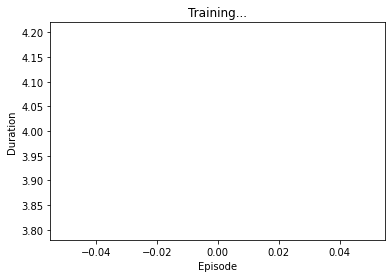

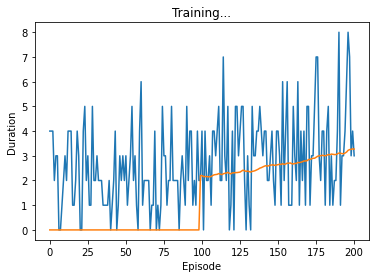

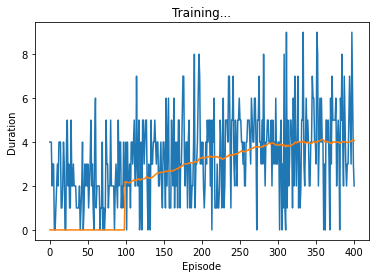

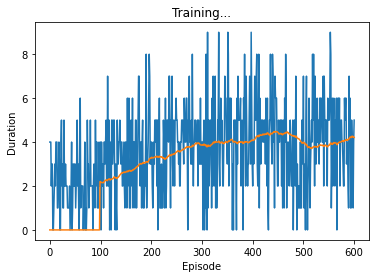

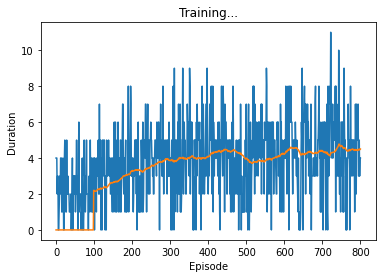

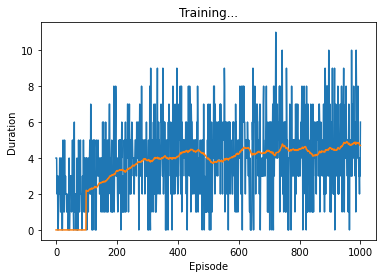

GOGO
GOGO


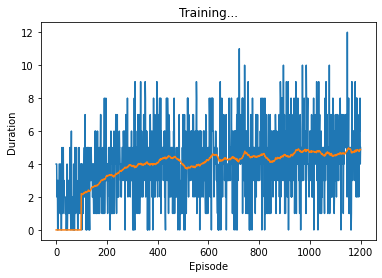

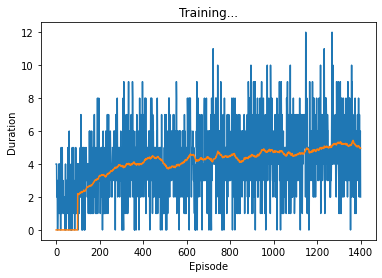

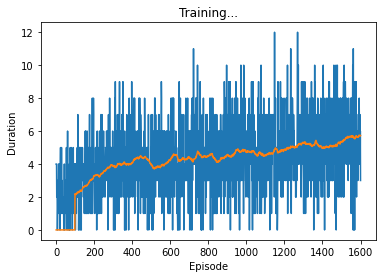

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


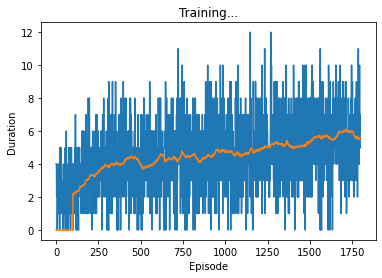

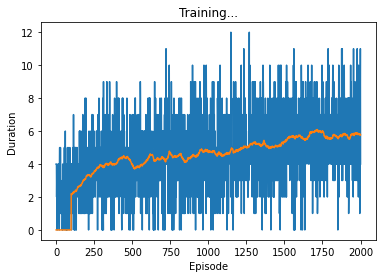

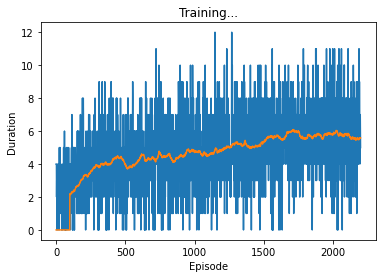

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


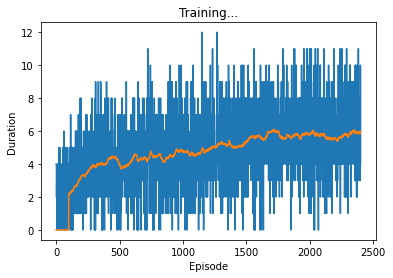

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


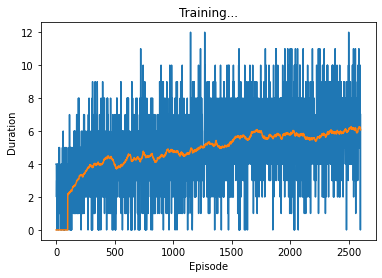

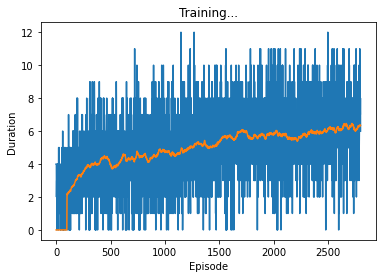

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


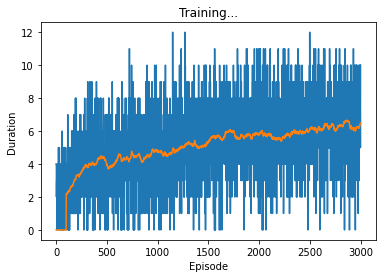

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


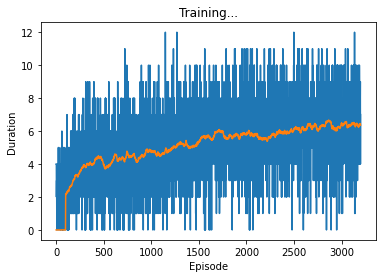

GOGO


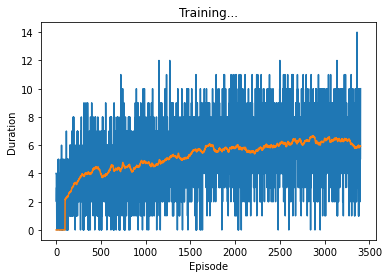

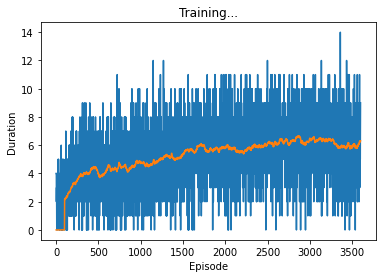

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


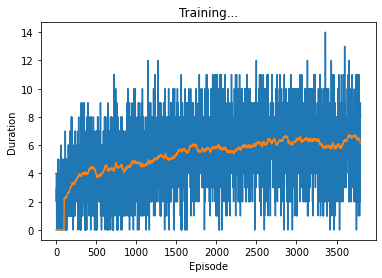

GOGO


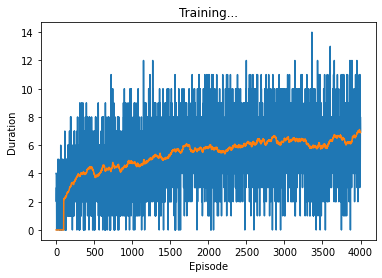

GOGO


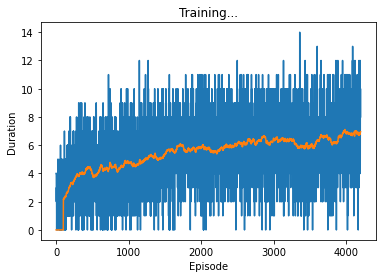

GOGO


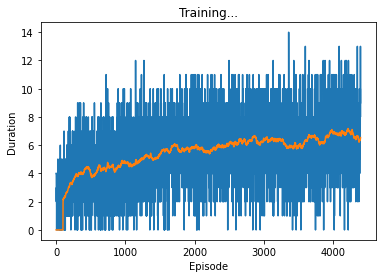

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


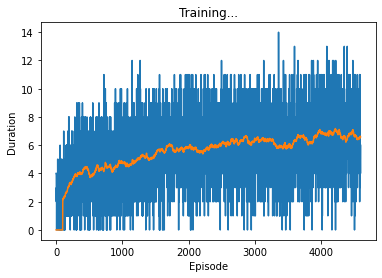

GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO
GOGO


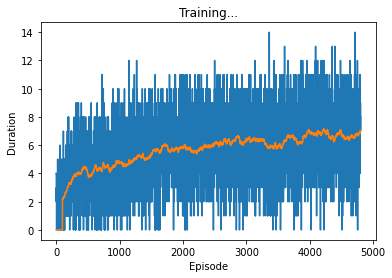

In [71]:
env = Enviro()
for i in range(EPISODES):
  state = env.reset()
  t = 0
  while True:
    action = find_action(state)
    next_state, reward, done = env.step(action.item())

    if done:
      reward = -1
      
    reward = torch.tensor([reward], device=device)

    memory.push(state, action, reward, next_state, torch.tensor([done], device=device))

    state = next_state

    learn()
    if done:
      episode_durations.append(t)
      break
    t += 1
  if i % T == 0:
    target_net.load_state_dict(policy_net.state_dict())
  if i % 200 == 0:
    plot_durations()
  

plt.ioff()
plt.show()